In [ ]:
import sklearn
from sklearn import tree
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train  = pd.read_csv('/content/gdrive/MyDrive/mlcourse/hw1/agaricus/agaricuslepiotatrain1.csv')
test  = pd.read_csv('/content/gdrive/MyDrive/mlcourse/hw1/agaricus/agaricuslepiotatest1.csv')

In [ ]:
train1  = pd.read_csv('/content/gdrive/MyDrive/mlcourse/hw1/data_sets1/training_set.csv')
test1  = pd.read_csv('/content/gdrive/MyDrive/mlcourse/hw1/data_sets1/test_set.csv')

In [ ]:
train.head()

,cap-shape-bell,cap-shape-conical,cap-shape-convex,cap-shape-flat,cap-shape-knobbed,cap-shape-sunken,cap-surface-fibrous,cap-surface-grooves,cap-surface-scaly,cap-surface-smooth,...,population-several,population-solitary,habitat-grasses,habitat-leaves,habitat-meadows,habitat-paths,habitat-urban,habitat-waste,habitat-woods,poisonous
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#separting label column from the attribute columns
classname = train.columns[-1];
print(classname)
xtrain = train.drop(columns=classname)
ytrain = train[classname];

xtest = test.drop(columns=classname);
ytest = test[classname];

poisonous


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(xtrain, ytrain)

In [ ]:
#train accuracy
print(1 - np.sum(np.abs(ytrain - clf.predict(xtrain)))/xtrain.shape[0])

1.0


In [ ]:
#test accuracy:
print(1 - np.sum(np.abs(ytest - clf.predict(xtest)))/xtest.shape[0])

0.9830588235294118


[Text(0.7083333333333334, 0.9166666666666666, 'odor-foul <= 0.5\nentropy = 0.963\nsamples = 6000\nvalue = [3680, 2320]\nclass = non-poisonous'),
 Text(0.625, 0.75, 'gill-size-broad <= 0.5\nentropy = 0.628\nsamples = 4368\nvalue = [3680, 688]\nclass = non-poisonous'),
 Text(0.4166666666666667, 0.5833333333333334, 'odor-none <= 0.5\nentropy = 0.903\nsamples = 904\nvalue = [288, 616]\nclass = poisonous'),
 Text(0.25, 0.4166666666666667, 'gill-spacing-close <= 0.5\nentropy = 0.592\nsamples = 672\nvalue = [96, 576]\nclass = poisonous'),
 Text(0.16666666666666666, 0.25, 'odor-creosote <= 0.5\nentropy = 1.0\nsamples = 192\nvalue = [96, 96]\nclass = non-poisonous'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 96\nvalue = [96, 0]\nclass = non-poisonous'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.0\nsamples = 96\nvalue = [0, 96]\nclass = poisonous'),
 Text(0.3333333333333333, 0.25, 'entropy = 0.0\nsamples = 480\nvalue = [0, 480]\nclass = poisonous'),
 Text(0.58

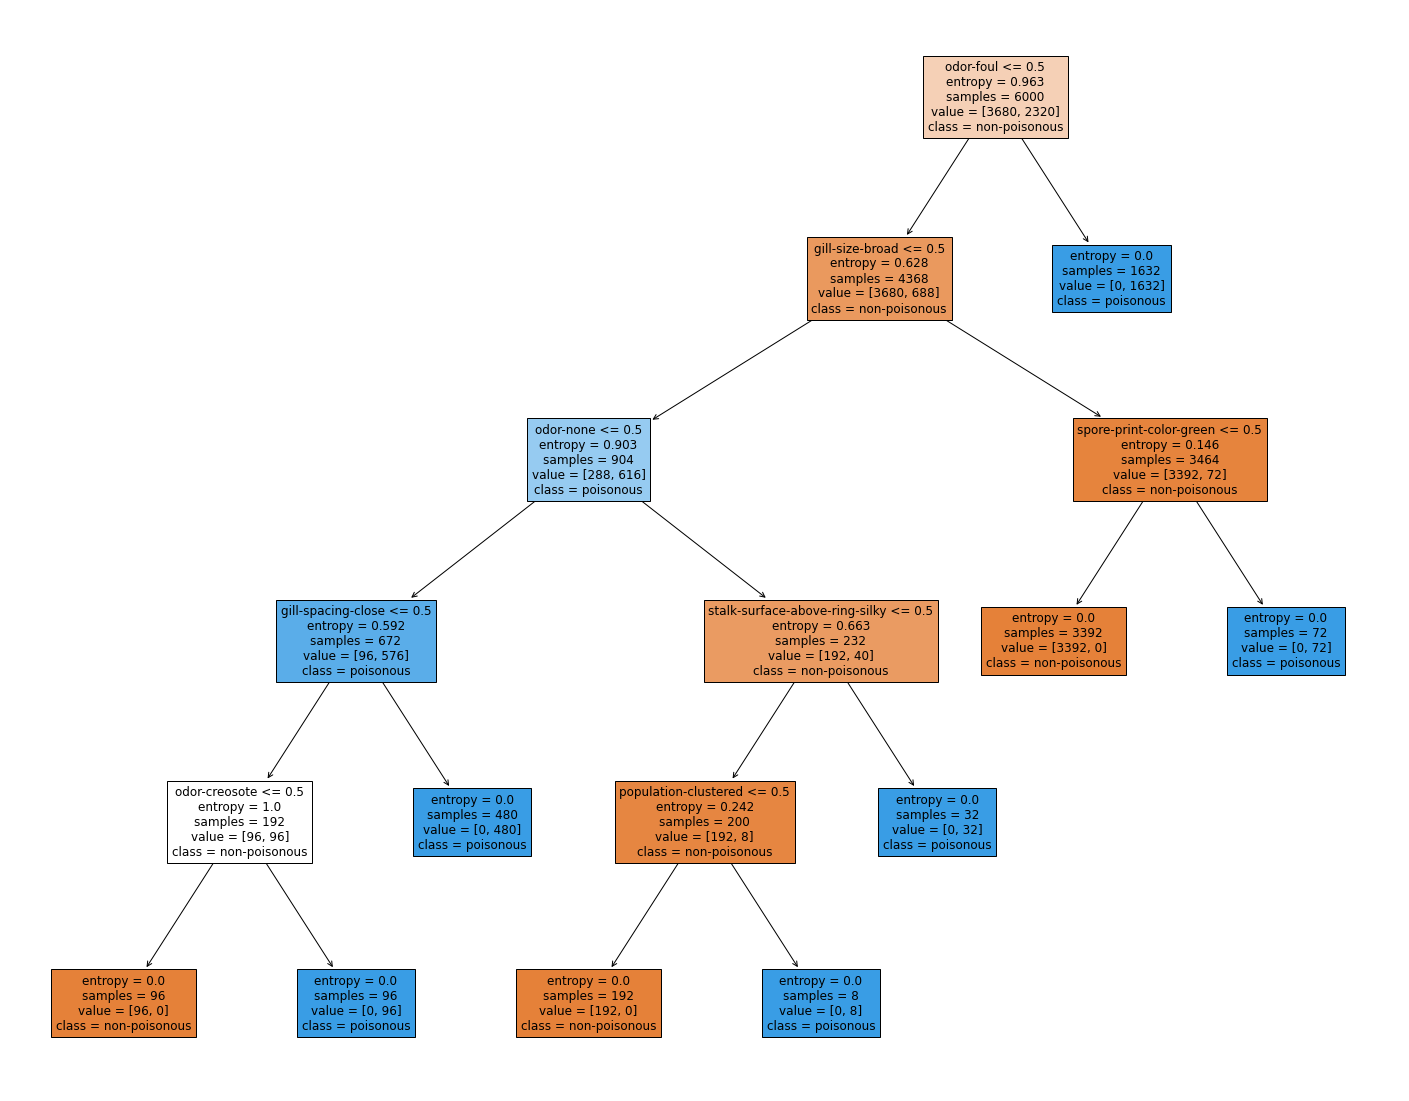

In [ ]:

fig = plt.figure(figsize=(25,20))
sklearn.tree.plot_tree(clf, filled=True, feature_names=xtrain.columns, class_names=['non-poisonous', 'poisonous'])